## Improting necessary libraries

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [ ]:
# Reading the Dataset using Pandas

df = pd.read_csv('wine.csv')
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Class
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [ ]:
# Renaming 'OD280/OD315 of diluted wines' to 'Diluted Wines' for simplicity

df = df.rename(columns={'OD280/OD315 of diluted wines':'Diluted Wines'})
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted Wines,Proline,Wine Class
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               177 non-null    float64
 1   Malic acid            177 non-null    float64
 2   Ash                   177 non-null    float64
 3   Alcalinity of ash     177 non-null    float64
 4   Magnesium             177 non-null    int64  
 5   Total phenols         177 non-null    float64
 6   Flavanoids            177 non-null    float64
 7   Nonflavanoid phenols  177 non-null    float64
 8   Proanthocyanins       177 non-null    float64
 9   Color intensity       177 non-null    float64
 10  Hue                   177 non-null    float64
 11  Diluted Wines         177 non-null    float64
 12  Proline               177 non-null    int64  
 13  Wine Class            177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [ ]:
df_test = df[['Alcohol','Ash','Wine Class']]
df_grp = df_test.groupby(['Alcohol','Ash'], as_index=False).mean()
df_grp

,Alcohol,Ash,Wine Class
0,11.03,2.20,2
1,11.41,2.50,2
2,11.45,2.42,2
3,11.46,1.82,2
4,11.56,3.23,2
...,...,...,...
170,14.38,2.28,1
171,14.38,2.38,1
172,14.39,2.45,1
173,14.75,2.39,1


Applying groupby method to find the relation of similar features with the dependent variable ie Wine Class

# **Visualizing data**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


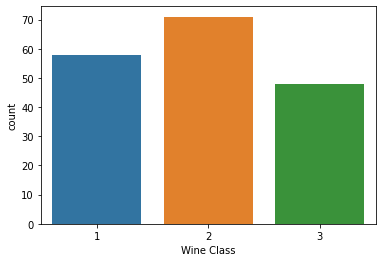

In [ ]:
sb.countplot(df['Wine Class'])


As from the above count plot, we can observe the count of each class wrt to the data


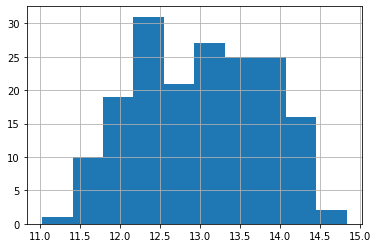

In [ ]:
df['Alcohol'].hist()

The Alcohol data shows the property of normality.

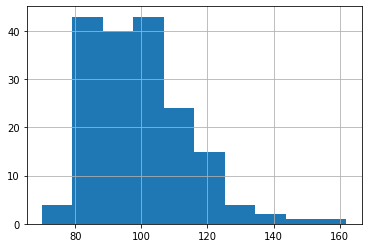

In [ ]:
df['Magnesium'].hist()

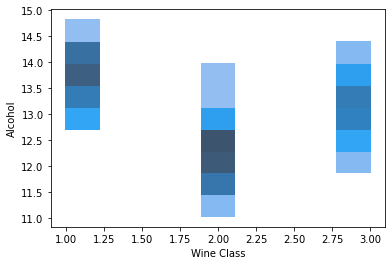

In [ ]:
sb.histplot(data=df, x='Wine Class', y='Alcohol', stat='count')

###Box plots for every feature wrt to 'Wine Class'

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


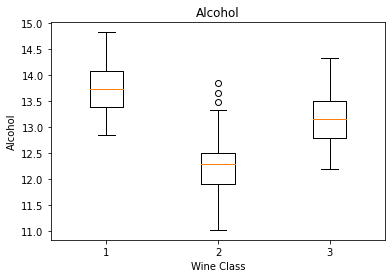

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


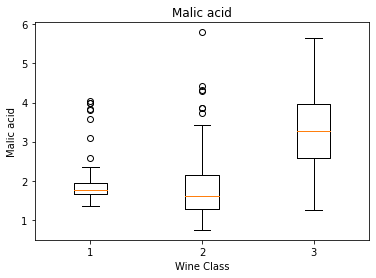

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


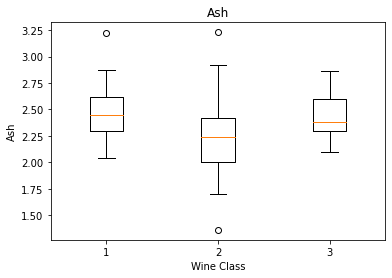

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


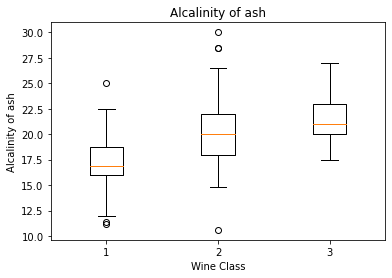

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


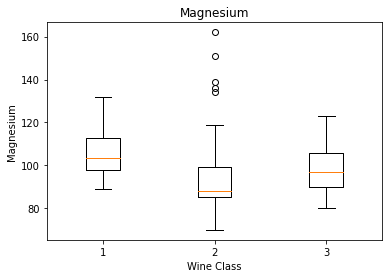

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


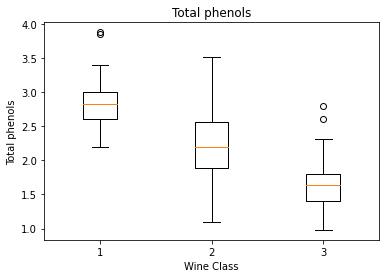

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


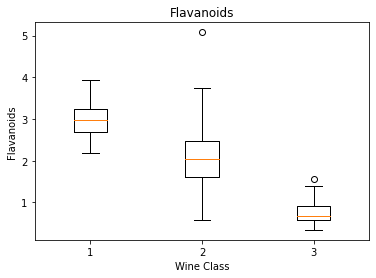

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


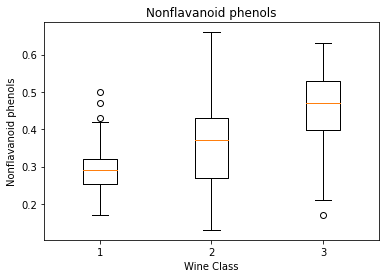

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


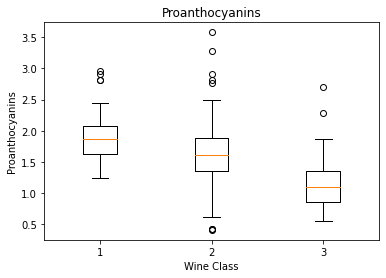

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


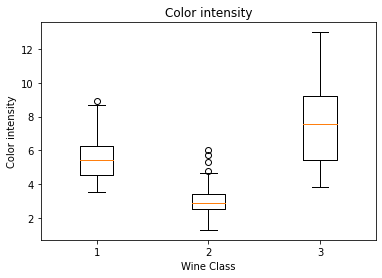

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


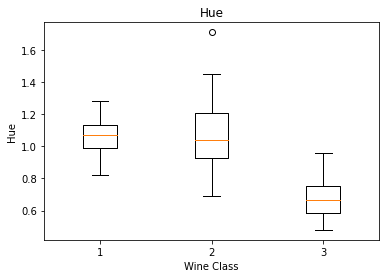

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


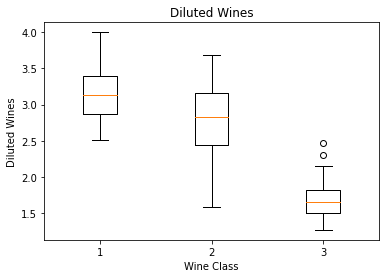

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


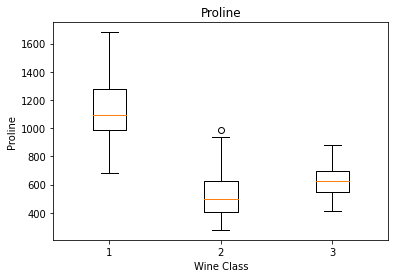

In [ ]:
for label in df.columns[:-1]:
  plt.boxplot([df[df['Wine Class']==i][label] for i in range (1,4) ])
  plt.title(label)
  plt.xlabel('Wine Class')
  plt.ylabel(label)
  plt.show()

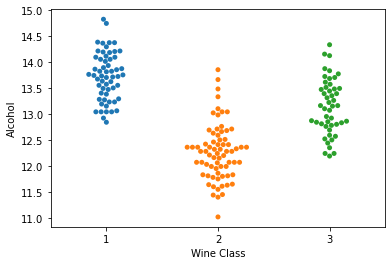

In [ ]:
sb.swarmplot(x='Wine Class', y='Alcohol', data=df)

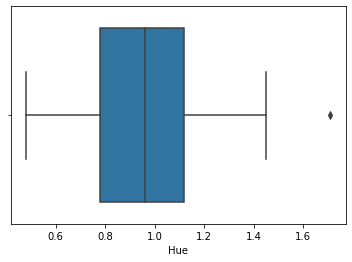

In [ ]:
sb.boxplot(x=df['Hue'])

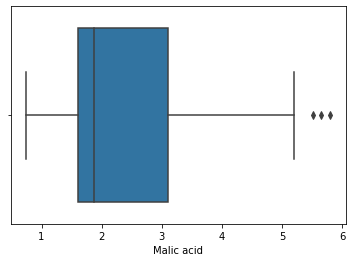

In [ ]:
sb.boxplot(x=df['Malic acid'])

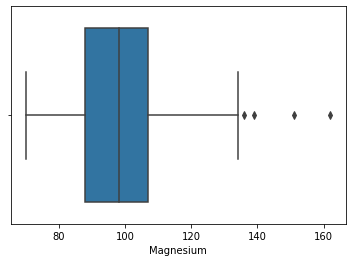

In [ ]:
sb.boxplot(x=df['Magnesium'])

From the above boxplots, we can observe a few outliers in the data such as in Magnesium, Malic acid and Hue. 

---





---



Text(0.5, 1.0, 'Malic acid and Wine class')

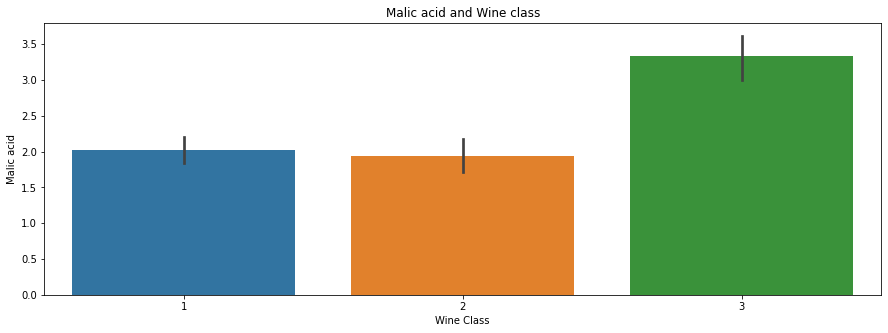

In [ ]:
plt.figure(figsize=(15,5))
sb.barplot(x= "Wine Class", y="Malic acid" , data = df) 
plt.title('Malic acid and Wine class')

The malic acid content is more in the 3rd class of the Wine, and almost same in the other two classes.

---



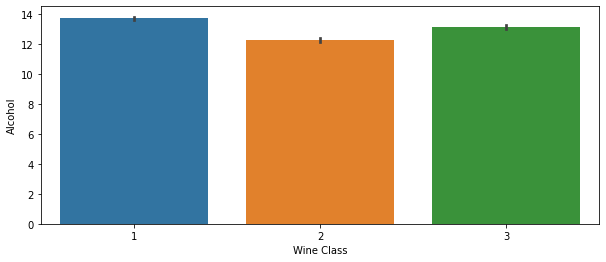

In [ ]:
plt.figure(figsize=(10,4))
sb.barplot(x= "Wine Class", y="Alcohol" , data = df )

The alcohol level is almost same in the first and the third class, and is relatively less when compared to them. 

---



In [ ]:
corr_matrix = df.corr()

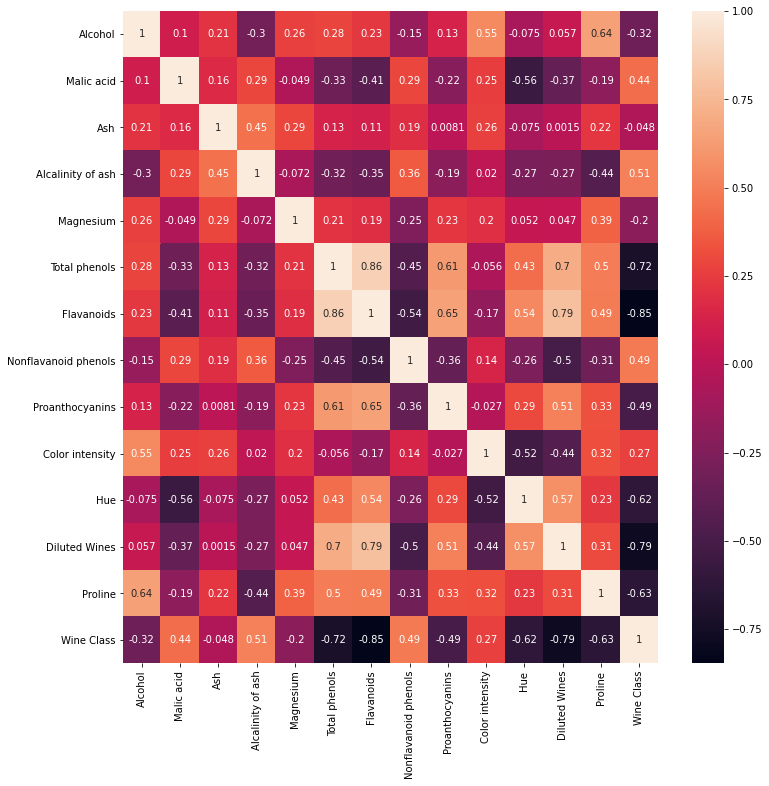

In [ ]:
plt.figure(figsize=(12,12))
sb.heatmap(corr_matrix,annot=True)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Alcohol'],df['Wine Class'])
print(pearson_coef, p_value)

-0.32123754922324005 1.3028895482526406e-05


corr : +1 -> Pos relationship -1 -> Neg Rel 0 -> no reln

P value : p < 0.001 -> strong certainty in the result p < 0.05 -> moderate p < 0.1 -> weak p > 0.1 -> no certainty

strong corr:

corr coeff: close to -1 or 1 p value less than 0.001

---



#Creating and Applying ML model to the data

In [ ]:
# Identifying and splitting the data into dependent and independent features. 

x = df[df.columns[:-1]]
y = df[df.columns[-1]]

Identifying Dependent and independent variables from the data. We can conclude that the Wine class is the dependent variable and the rest are independent. 
Hence splitting the data into dependent and independent variables. 
x and y respectively.


In [ ]:
x,y  

(     Alcohol  Malic acid   Ash  ...   Hue  Diluted Wines  Proline
 0      13.20        1.78  2.14  ...  1.05           3.40     1050
 1      13.16        2.36  2.67  ...  1.03           3.17     1185
 2      14.37        1.95  2.50  ...  0.86           3.45     1480
 3      13.24        2.59  2.87  ...  1.04           2.93      735
 4      14.20        1.76  2.45  ...  1.05           2.85     1450
 ..       ...         ...   ...  ...   ...            ...      ...
 172    13.71        5.65  2.45  ...  0.64           1.74      740
 173    13.40        3.91  2.48  ...  0.70           1.56      750
 174    13.27        4.28  2.26  ...  0.59           1.56      835
 175    13.17        2.59  2.37  ...  0.60           1.62      840
 176    14.13        4.10  2.74  ...  0.61           1.60      560
 
 [177 rows x 13 columns], 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 172    3
 173    3
 174    3
 175    3
 176    3
 Name: Wine Class, Length: 177, dtype: int64)

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

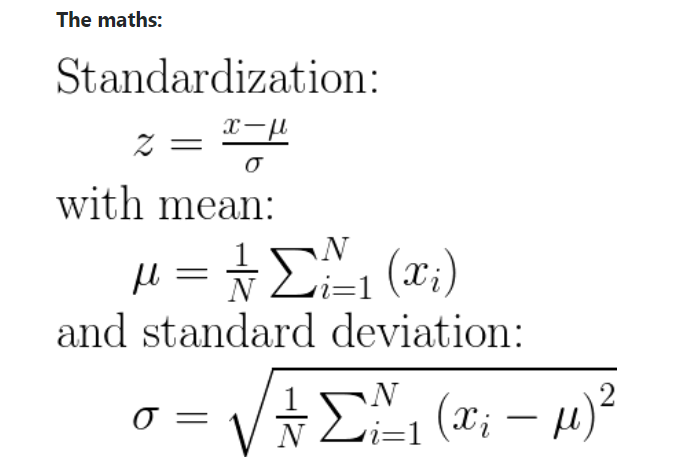

In [ ]:
for data in [y_train,y_test]:
  print(data.describe())

count    141.000000
mean       1.971631
std        0.774073
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Wine Class, dtype: float64
count    36.000000
mean      1.833333
std       0.774597
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Wine Class, dtype: float64


##Random forest model


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = classifier.predict(x_test)
pred
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      0.86      0.89        14
           3       0.80      1.00      0.89         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36



As from the reports, we can observe a pretty good accuracy score and F1 score. Hence we can conclude the model can be used for prediction. 


##**Prediction using custom Data**

In [ ]:
classifier.predict([[9.19,3.4,0.99,23,108,3.3,2.13,1.32,1.86,8.7,1.23,2.82,1680]])

array([1])

From the provided input, the model correctly predicts the correct class of the wine.

In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[13,  1,  0],
       [ 0, 12,  2],
       [ 0,  0,  8]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


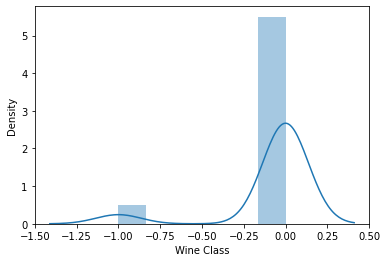

In [ ]:
sb.distplot(y_test-pred)

#Random Forest Regressor (Try)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rf_random = RandomForestRegressor()

In [ ]:
#randomized search 

# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1800, num = 12 )]
# max_features = ['auto','sqrt']
# max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

# min_samples_split = [2,5,10,15,100]
# min_samples_leaf = [1,2,5,10]

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# random_grid = {'n_estimators':n_estimators,
#                'max_features':max_features,
#                'max_depth':max_depth,
#                'min_samples_split':min_samples_split,
#                'min_samples_leaf': min_samples_leaf
#                }
# print(random_grid)

In [ ]:
# rf = RandomForestRegressor()
# rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid, 
#                                scoring='neg_mean_squared_error', n_iter=10,
#                                cv=5,verbose=2,random_state=42,
#                                n_jobs=1)

In [ ]:
# rf_random.fit(x_train,y_train)

In [ ]:
# pred = rf_random.predict(x_test)

In [ ]:
#acf pacf